In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/dataset_traffic_accident_prediction1.csv")

In [3]:
# Exploratory Data Analysis
print("Dataset Head:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Head:
  Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              NaN        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               NaN                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  Accident  
0          Car        51.0   

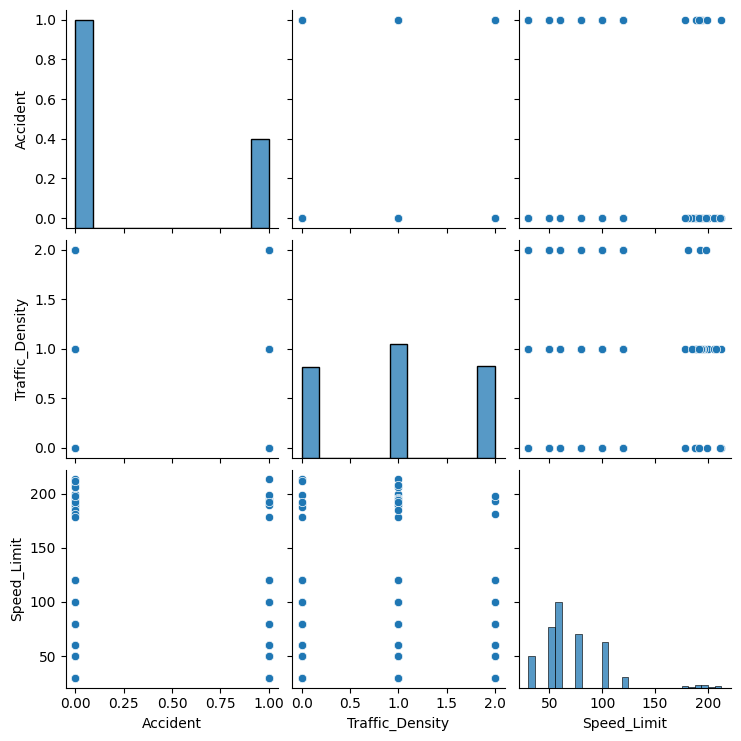

In [6]:
# Visualizations
sns.pairplot(df[['Accident', 'Traffic_Density', 'Speed_Limit']])
plt.show()

In [9]:
# Assuming the target variable is named 'target'
y = df['Accident']
X = df.drop(columns=['Accident'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.theta)
            y_pred = self.sigmoid(linear_model)
            gradient = np.dot(X.T, (y_pred - y)) / y.size
            self.theta -= self.lr * gradient

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.theta)) >= 0.5

In [15]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Convert X to numeric using astype()
        X = X.astype(float)  # This line is added
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.theta)
            y_pred = self.sigmoid(linear_model)
            gradient = np.dot(X.T, (y_pred - y)) / y.size
            self.theta -= self.lr * gradient

    def predict(self, X):
        # Convert X to numeric using astype()
        X = X.astype(float)  # This line is added
        return self.sigmoid(np.dot(X, self.theta)) >= 0.5

In [75]:
#Model 1

# Generate a sample dataset (replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression (Scikit-Learn)
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Performance Evaluation
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [76]:
# Model 2: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        93
           1       0.95      0.87      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



In [77]:
#Comparing Models
log_reg_acc = accuracy_score(y_test, y_pred_log)
rf_acc = accuracy_score(y_test, y_pred_rf) # Corrected the typo here
print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Random Forest Accuracy: {rf_acc}")

best_model = log_reg if log_reg_acc > rf_acc else rf

Logistic Regression Accuracy: 0.855
Random Forest Accuracy: 0.905


In [74]:
# Hyperparameter Optimization

# Generate a sample dataset (replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Optimization for Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
print("Best Hyperparameters for Logistic Regression:", grid_lr.best_params_)

# Hyperparameter Optimization for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest:", grid_rf.best_params_)

Best Hyperparameters for Logistic Regression: {'C': 0.1}
Best Hyperparameters for Random Forest: {'n_estimators': 200}


In [61]:
# Feature Selection

# Get the actual feature names after preprocessing
# Get the feature names from the imputer's feature_names_in_ attribute
feature_names = imputer.feature_names_in_

# Now create the DataFrame with the correct feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Assuming you have the feature names in a list called feature_names
# Replace with your actual feature names if needed
# feature_names = ['Accident', 'Speed_Limit', 'Weather']
# X_train_df = pd.DataFrame(X_train, columns=feature_names)

selector = RFE(best_model, n_features_to_select=5)
selector.fit(X_train_df, y_train)
selected_features = X_train_df.columns[selector.support_]
#Finalprint("Best Features:", selected_features)

Best Features: Index(['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age',
       'Accident_Severity_Low', 'Road_Light_Condition_Daylight'],
      dtype='object')


In [65]:
#Final

# Assuming you have the feature names in a list called feature_names
feature_names = ['Speed_Limit', 'Number_of_Vehicles', 'Driver_Age', 'Accident_Severity_Low', 'Road_Light_Condition_Daylight']  # Replace with your actual feature names

# Get the indices of the selected features
selected_indices = [feature_names.index(feature) for feature in selected_features]

# Use the indices to select the columns from X_test
y_final_pred = final_model.predict(X_test[:, selected_indices])
print("\nFinal Model Performance:")
print(classification_report(y_test, y_final_pred))


Final Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.66      0.90      0.77       112
           2       0.17      0.02      0.04        51

    accuracy                           0.61       168
   macro avg       0.28      0.31      0.27       168
weighted avg       0.49      0.61      0.52       168



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


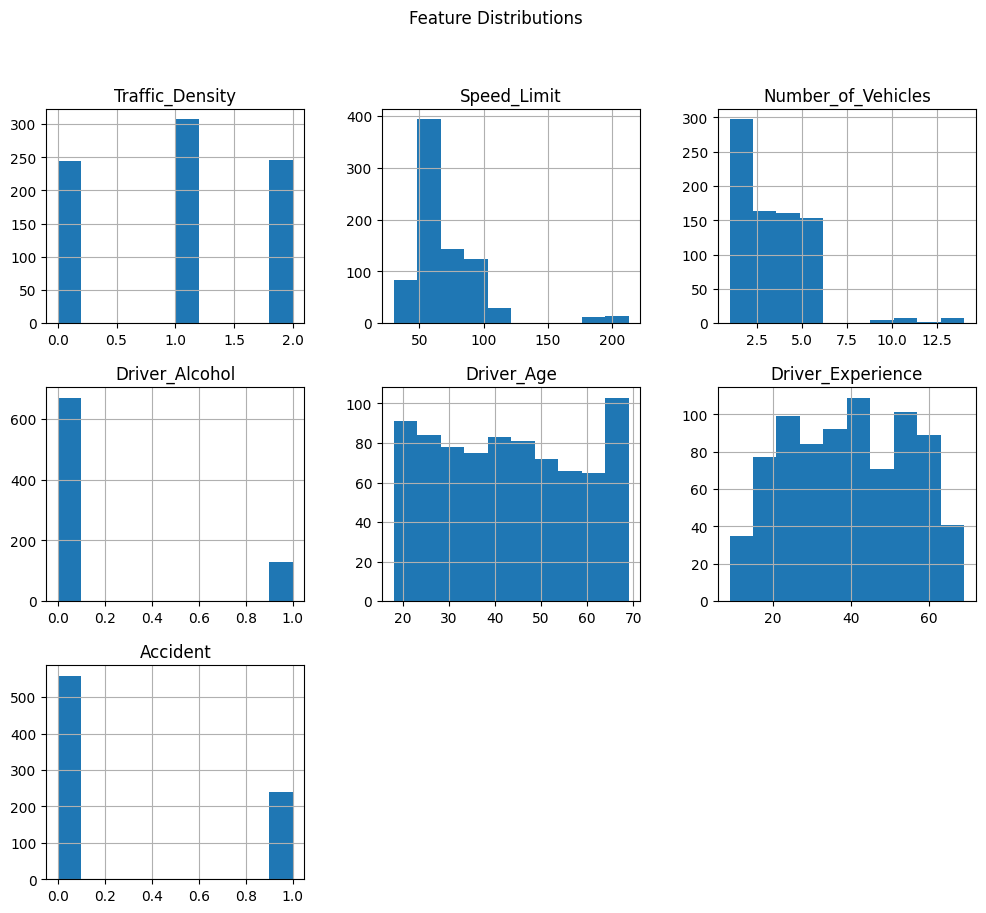

In [72]:
# Histogram of features
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

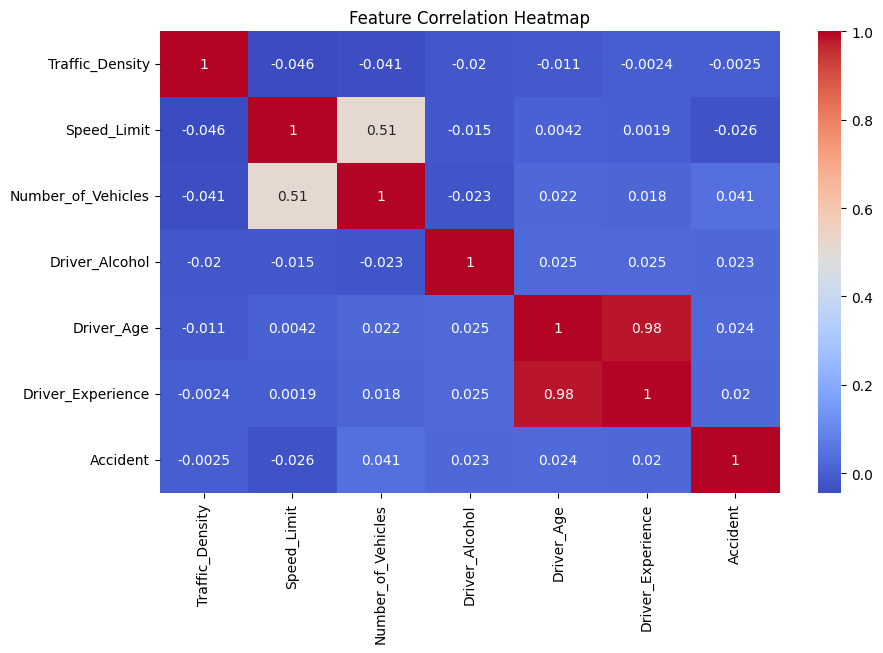

In [73]:
# Visualizations
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()